In [4]:
from ucimlrepo import fetch_ucirepo # Used to import the dataset
import pandas as pd
import numpy as np
  
# fetch dataset 
dataset = fetch_ucirepo(id=235)
# dataset = pd.read_csv('household_power_consumption.csv', sep=';')
  
# data (as pandas dataframes) 
X = dataset.data.features
y = dataset.data.targets 
  
# metadata 
print(dataset.metadata) 
  
# variable information 
print(dataset.variables) 

c:\Users\gwatt\AppData\Local\Programs\Python\Python312\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [5]:
float_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
X[float_columns] = X[float_columns].apply(pd.to_numeric, errors='coerce')

In [6]:
PF = np.cos(np.arctan(X['Global_reactive_power'] / X['Global_active_power']))
X.insert(4, 'Power_factor', PF, True)

X

Date      Time  Global_active_power  Global_reactive_power  \
0        16/12/2006  17:24:00                4.216                  0.418   
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Power_factor  Voltage  Global_intensity  Sub_metering_1  \
0            0.995121   234.84              18.4             0.0   
1            0.996708   233.63              23.0             0.0   
2            0.995734   233.29              23.0             0.0   
3            0.995688   233.74              23.0             0.0   
4            0.989787   235.68              15.8             0.0   
...               ...      ...               ...             ...   
2075254      1.000000   240.43               4.0             0.0   
2075255      1.000000   240.00               4.0             0.0   
2075256      1.000000   239.82               3.8             0.0   
2075257      1.000000   239.70               3.8             0.0   
2075258      1.000000   239.55               3.8             0.0   

         Sub_metering_2  Sub_metering_3  
0                   1.0            17.0  
1                   1.0            16.0  
2                   2.0            17.0  
3                   1.0            17.0  
4                   1.0            17.0  
...                 ...             ...  
2075254             0.0             0.0  
2075255             0.0             0.0  
2075256             0.0             0.0  
2075257             0.0             0.0  
2075258             0.0             0.0  

[2075259 rows x 10 columns]

In [7]:
X.describe(include='all')

Date      Time  Global_active_power  Global_reactive_power  \
count     2075259   2075259         2.049280e+06           2.049280e+06   
unique       1442      1440                  NaN                    NaN   
top     6/12/2008  17:24:00                  NaN                    NaN   
freq         1440      1442                  NaN                    NaN   
mean          NaN       NaN         1.091615e+00           1.237145e-01   
std           NaN       NaN         1.057294e+00           1.127220e-01   
min           NaN       NaN         7.600000e-02           0.000000e+00   
25%           NaN       NaN         3.080000e-01           4.800000e-02   
50%           NaN       NaN         6.020000e-01           1.000000e-01   
75%           NaN       NaN         1.528000e+00           1.940000e-01   
max           NaN       NaN         1.112200e+01           1.390000e+00   

        Power_factor       Voltage  Global_intensity  Sub_metering_1  \
count   2.049280e+06  2.049280e+06      2.049280e+06    2.049280e+06   
unique           NaN           NaN               NaN             NaN   
top              NaN           NaN               NaN             NaN   
freq             NaN           NaN               NaN             NaN   
mean    9.636864e-01  2.408399e+02      4.627759e+00    1.121923e+00   
std     5.810473e-02  3.239987e+00      4.444396e+00    6.153031e+00   
min     5.558553e-01  2.232000e+02      2.000000e-01    0.000000e+00   
25%     9.519593e-01  2.389900e+02      1.400000e+00    0.000000e+00   
50%     9.934251e-01  2.410100e+02      2.600000e+00    0.000000e+00   
75%     9.997272e-01  2.428900e+02      6.400000e+00    0.000000e+00   
max     1.000000e+00  2.541500e+02      4.840000e+01    8.800000e+01   

        Sub_metering_2  Sub_metering_3  
count     2.049280e+06    2.049280e+06  
unique             NaN             NaN  
top                NaN             NaN  
freq               NaN             NaN  
mean      1.298520e+00    6.458447e+00  
std       5.822026e+00    8.437154e+00  
min       0.000000e+00    0.000000e+00  
25%       0.000000e+00    0.000000e+00  
50%       0.000000e+00    1.000000e+00  
75%       1.000000e+00    1.700000e+01  
max       8.000000e+01    3.100000e+01

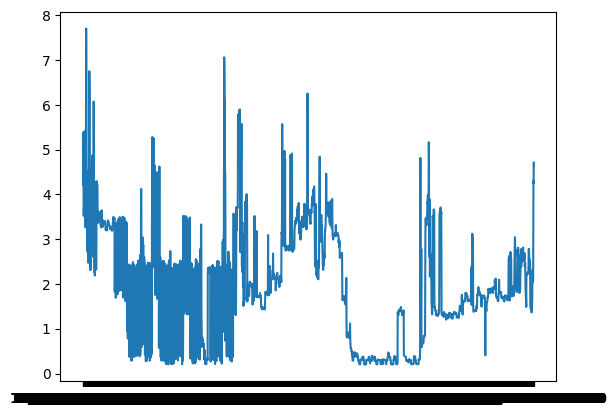

In [30]:
import matplotlib.pyplot as plt
import datetime

# plt.plot(X['Global_active_power'])
DateTime = X['Date'].str.cat(X['Time'].values.astype(str), sep=' ')
plt.plot(DateTime[0:3000], X['Global_active_power'][0:3000])

In [28]:
# .datetime.combine()



DateTime
# pd.to_datetime(X['Date'] + X['Time'])
# X['Datetime'] = [f"{row['Date']} {row['Time']}" for row in X.iterrows]

0          16/12/2006 17:24:00
1          16/12/2006 17:25:00
2          16/12/2006 17:26:00
3          16/12/2006 17:27:00
4          16/12/2006 17:28:00
                  ...         
2075254    26/11/2010 20:58:00
2075255    26/11/2010 20:59:00
2075256    26/11/2010 21:00:00
2075257    26/11/2010 21:01:00
2075258    26/11/2010 21:02:00
Name: Date, Length: 2075259, dtype: object

In [16]:
X['Global_active_power'][:200]

0      4.216
1      5.360
2      5.374
3      5.388
4      3.666
       ...  
195    3.204
196    3.232
197    3.254
198    3.376
199    3.372
Name: Global_active_power, Length: 200, dtype: float64
